<a href="https://colab.research.google.com/github/astridyusiang-pixel/Mini-Projects/blob/main/Classification_of_Pneumonia_from_Chest_X_ray_Images_Using_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:24<00:00, 37.7MB/s]
100% 2.29G/2.29G [00:24<00:00, 102MB/s] 
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 577ms/step - accuracy: 0.8720 - loss: 0.3113 - val_accuracy: 0.8702 - val_loss: 0.2917
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 474ms/step - accuracy: 0.9337 - loss: 0.1570 - val_accuracy: 0.8734 - val_loss: 0.2638
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 76s 468ms/step - accuracy: 0.9379 - loss: 0.1505 - val_accuracy: 0.8878 - val_loss: 0.2636
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 452ms/step - accuracy: 0.9466 - loss: 0.1395 - val_accuracy: 0.8798 - val_loss: 0.2763
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 78s 476ms/step - accuracy: 0.9562 - loss: 0.1234 - val_accuracy: 0.8878 - val_loss: 0.2596


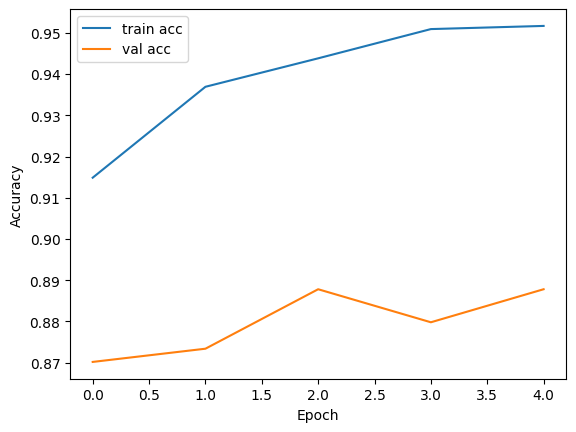

In [2]:

!pip install kaggle --quiet


from google.colab import files
files.upload()


!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip -q chest-xray-pneumonia.zip


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models


img_height, img_width = 160, 160
batch_size = 32
epochs = 5


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './chest_xray/chest_xray/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    './chest_xray/chest_xray/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


base_model = MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # freeze base model


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)


import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Trained a MobileNetV2 model to classify chest X-rays as Pneumonia or Normal. Using a pretrained base with frozen layers, the model achieved promising accuracy on both training and validation sets, demonstrating its ability to distinguish the two classes effectively. Further improvements could include fine-tuning or additional performance evaluation.